
# Esercizio 11.2



<img src="grafici2/2.png" width="50%">
<img src="grafici2/4.png" width="50%">
<img src="grafici2/3.png" width="50%">


<img src="grafici2/5.png" width="50%">
<img src="grafici2/6.png" width="50%">


<img src="grafici2/7.png" width="50%">
<img src="grafici2/8.png" width="50%">



<img src="grafici2/1.png" width="50%">
<img src="grafici2/10.png" width="50%">


Come atteso i fit migliori sono quelli ottenuti con relu e sdg. Anche nel caso in cui le funzioni di attivazione vengono mischiate, la presenza di una relu migliora significativamente il fit dei dati. 
Notiamo inoltre che il fit migliore è quello ottenuto con un elevato numero di layer, seppur la quantità di neuroni per ogni layer sia ridotta (ultimo grafico).
Infine osserviamo che, anche nella situazione migliore, al di fuori dell'intervallo di training (-1, 1) la funzione ottenuta approssima male la funzione data, infatti al di fuori dell'intervallo non è stato fatto nessun training.

# Codice utilizzato

In [ ]:
import numpy as np

Parametri:
epoche: 25
training points: 5000
valid points: 500
noise: 0.2

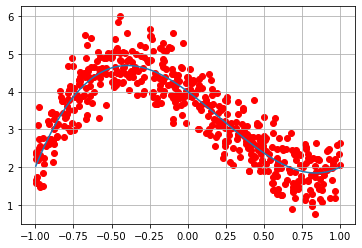

In [158]:
a=4
b=-3
c=-2
d=3

def f (x,a,b,c,d):
    return a+ b*x +c*x**2 +d*x**3

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 5000)
x_valid = np.random.uniform(-1, 1, 500)
x_valid.sort()
y_target = f(x_valid, a,b,c,d )  # ideal (target) polinomial function

sigma = 0.5 # noise standard deviation
y_train = np.random.normal(f(x_train,a,b,c,d), sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(f(x_valid,a,b,c,d), sigma)

# plot training and target dataset
import matplotlib.pyplot as plt
plt.plot(x_valid, y_target)
plt.scatter(x_valid, y_valid, color='r')
plt.grid(True); plt.show()

In [159]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
model.add(Dense(27, input_shape=(1,)))
model.add(Dense(18, activation='relu'))
model.add(Dense(9, activation='relu'))
model.add(Dense(1))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

# get a summary of our composed model
model.summary()

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_131 (Dense)            (None, 27)                54        
_________________________________________________________________
dense_132 (Dense)            (None, 18)                504       
_________________________________________________________________
dense_133 (Dense)            (None, 9)                 171       
_________________________________________________________________
dense_134 (Dense)            (None, 1)                 10        
Total params: 739
Trainable params: 739
Non-trainable params: 0
_________________________________________________________________


In [160]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=25,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Train on 5000 samples, validate on 500 samples
Epoch 1/25
5000/5000 [==============================] - 1s 135us/sample - loss: 1.0827 - mse: 1.0827 - val_loss: 0.5544 - val_mse: 0.5544
Epoch 2/25
5000/5000 [==============================] - 0s 33us/sample - loss: 0.4104 - mse: 0.4104 - val_loss: 0.3429 - val_mse: 0.3429
Epoch 3/25
5000/5000 [==============================] - 0s 35us/sample - loss: 0.2928 - mse: 0.2928 - val_loss: 0.2970 - val_mse: 0.2970
Epoch 4/25
5000/5000 [==============================] - 0s 34us/sample - loss: 0.2726 - mse: 0.2726 - val_loss: 0.2578 - val_mse: 0.2578
Epoch 5/25
5000/5000 [==============================] - 0s 34us/sample - loss: 0.2662 - mse: 0.2662 - val_loss: 0.2870 - val_mse: 0.2870
Epoch 6/25
5000/5000 [==============================] - 0s 34us/sample - loss: 0.2615 - mse: 0.2615 - val_loss: 0.2505 - val_mse: 0.2505
Epoch 7/25
5000/5000 [==============================] - 0s 34us/sample - loss: 0.2585 - mse: 0.2585 - val_loss: 0.2434 - val_mse: 

In [161]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

500/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================


Test loss: 0.24286680245399475
Test accuracy: 0.24286678


In [162]:
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

500/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================


Test loss: 0.0037278524534776806
Test accuracy: 0.0037278526


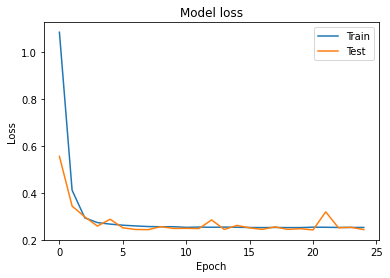

In [163]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()






          '\n Primo: 4 neuroni, '
          '\n Secondo: 4 neuroni, activation=relu, '
          '\n Terzo: 4 neuroni, activation=relu '
          '\n Quarto: 4 neuroni, activation=relu, '
          '\n Quinto: 4 neuroni, activation=relu, '          
          '\n Secondo: 4 neuroni, activation=relu, '          
          '\n Secondo: 4 neuroni, activation=relu, '
          
          
          '\n Quarto: output'
          '\n optimizer= sdg, loss=mse'
         )

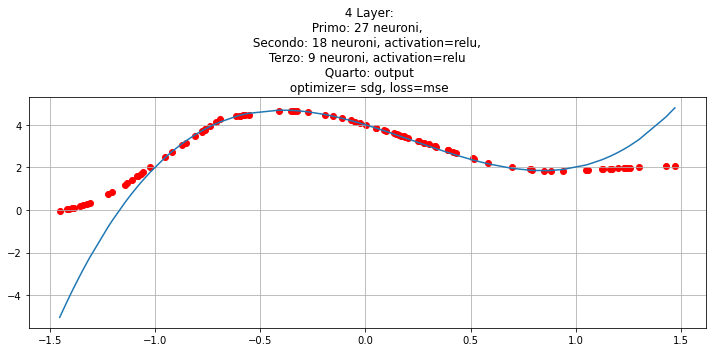

In [164]:

fig=plt.figure(figsize=(10, 5))
x_predicted = np.random.uniform(-1.5, 1.5, 100)
x_predicted.sort()
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_predicted, f(x_predicted,a,b,c,d))
plt.title(' 4 Layer:'
          '\n Primo: 27 neuroni, '
          '\n Secondo: 18 neuroni, activation=relu, '
          '\n Terzo: 9 neuroni, activation=relu '
          '\n Quarto: output'
          '\n optimizer= sdg, loss=mse'
         )




plt.grid(True)
plt.tight_layout()


#plt.savefig("grafici2/8.png")

plt.show()